<h1 align='center'><u>Covid-19 case recovery in india forecasting</u></h1>


### Importing important library:~

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to remove the harmless warning
import warnings
warnings.filterwarnings('ignore')

# 1. Loading our dataset:~

In [6]:
df = pd.read_csv('region_date_metadata.csv')

In [7]:
df

,Province_State,Country_Region,Date,Recoveries
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0
...,...,...,...,...
27715,NaN,Western Sahara,2020-05-10,5
27716,NaN,Sao Tome and Principe,2020-05-10,4
27717,NaN,Yemen,2020-05-10,1
27718,NaN,Comoros,2020-05-10,0


# 2. Data Cleaning:~

In [8]:
data = df[['Date','Recoveries']][df['Country_Region']=='India']

In [9]:
data

,Date,Recoveries
125,2020-01-22,0
377,2020-01-23,0
629,2020-01-24,0
881,2020-01-25,0
1133,2020-01-26,0
...,...,...
26585,2020-05-06,15331
26837,2020-05-07,16776
27089,2020-05-08,17887
27341,2020-05-09,19301


In [22]:
data = data.reset_index()

In [23]:
data

,index,Date,Recoveries
0,125,2020-01-22,0
1,377,2020-01-23,0
2,629,2020-01-24,0
3,881,2020-01-25,0
4,1133,2020-01-26,0
...,...,...,...
105,26585,2020-05-06,15331
106,26837,2020-05-07,16776
107,27089,2020-05-08,17887
108,27341,2020-05-09,19301


In [24]:
data = data.drop('index',1)

In [25]:
data

,Date,Recoveries
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
105,2020-05-06,15331
106,2020-05-07,16776
107,2020-05-08,17887
108,2020-05-09,19301


In [26]:
data[data['Recoveries']==0]

,Date,Recoveries
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
5,2020-01-27,0
6,2020-01-28,0
7,2020-01-29,0
8,2020-01-30,0
9,2020-01-31,0


In [30]:
data1 = data[24:]

In [32]:
data1 = data1.reset_index()

In [33]:
data1

,index,Date,Recoveries
0,24,2020-02-15,0
1,25,2020-02-16,3
2,26,2020-02-17,3
3,27,2020-02-18,3
4,28,2020-02-19,3
...,...,...,...
81,105,2020-05-06,15331
82,106,2020-05-07,16776
83,107,2020-05-08,17887
84,108,2020-05-09,19301


In [34]:
data1 = data1.drop('index',1)

In [35]:
data1

,Date,Recoveries
0,2020-02-15,0
1,2020-02-16,3
2,2020-02-17,3
3,2020-02-18,3
4,2020-02-19,3
...,...,...
81,2020-05-06,15331
82,2020-05-07,16776
83,2020-05-08,17887
84,2020-05-09,19301


In [37]:
i = 0
Recovery = []
for i in range(len(data1['Recoveries'])):
    a = data1['Recoveries'][i]
    if i == 0:
        Recovery.append(a)
        i+=1
    else:
        b = data1['Recoveries'][i-1]
        c = a-b
        Recovery.append(c)
        i+=1
data1['Recovery'] = Recovery

In [38]:
data1

,Date,Recoveries,Recovery
0,2020-02-15,0,0
1,2020-02-16,3,3
2,2020-02-17,3,0
3,2020-02-18,3,0
4,2020-02-19,3,0
...,...,...,...
81,2020-05-06,15331,1189
82,2020-05-07,16776,1445
83,2020-05-08,17887,1111
84,2020-05-09,19301,1414


In [39]:
data2 = data1.drop('Recoveries',1)

In [40]:
data2

,Date,Recovery
0,2020-02-15,0
1,2020-02-16,3
2,2020-02-17,0
3,2020-02-18,0
4,2020-02-19,0
...,...,...
81,2020-05-06,1189
82,2020-05-07,1445
83,2020-05-08,1111
84,2020-05-09,1414


In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      86 non-null     object
 1   Recovery  86 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [43]:
data2['Date'] = pd.to_datetime(data2['Date'], dayfirst=True)

In [44]:
data2

,Date,Recovery
0,2020-02-15,0
1,2020-02-16,3
2,2020-02-17,0
3,2020-02-18,0
4,2020-02-19,0
...,...,...
81,2020-05-06,1189
82,2020-05-07,1445
83,2020-05-08,1111
84,2020-05-09,1414


In [45]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      86 non-null     datetime64[ns]
 1   Recovery  86 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [46]:
data2.set_index('Date',inplace=True) # set the date column as index

In [47]:
data2

,Recovery
Date,
2020-02-15,0
2020-02-16,3
2020-02-17,0
2020-02-18,0
2020-02-19,0
...,...
2020-05-06,1189
2020-05-07,1445
2020-05-08,1111


In [49]:
data2.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
      

In [50]:
data2.index.freq = 'D'

In [51]:
data2.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
      

Text(0, 0.5, 'Recovery')

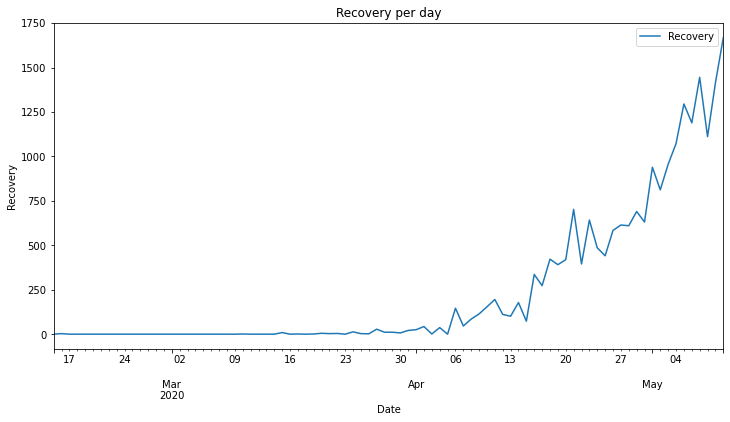

In [52]:
ax = data2.plot(figsize=(12,6));
ax.set_title('Recovery per day')
ax.set_xlabel('Date')
ax.set_ylabel('Recovery')

# 3. Run an ETS Decomposition:~

In [53]:
data2.head()

,Recovery
Date,
2020-02-15,0
2020-02-16,3
2020-02-17,0
2020-02-18,0
2020-02-19,0


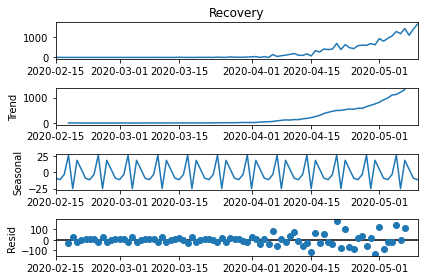

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data2['Recovery'], model='additive')  # model='add' also works
result.plot();

# 4. pmdarima Auto-ARIMA:~

In [55]:
from pmdarima import auto_arima

In [61]:
auto_arima(data2['Recovery'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   86
Model:             SARIMAX(2, 2, 1)x(2, 0, [], 7)   Log Likelihood                -485.112
Date:                            Sat, 16 May 2020   AIC                            984.224
Time:                                    19:19:32   BIC                           1001.240
Sample:                                         0   HQIC                           991.064
                                             - 86                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4489      1.672      1.464      0.143      -0.829       5.727
ar.L1         -0.9477      0.096     -9.838      0.000      -1.136      -0.759
ar.L2         -0.4119      0.081     -5.113      0.000      -0.570      -0.254
ma.L1         -0.8706      0.074    -11.696      0.000      -1.016      -0.725
ar.S.L7       -0.2730      0.118     -2.311      0.021      -0.505      -0.042
ar.S.L14       0.2265      0.115      1.976      0.048       0.002       0.451
sigma2      5683.1453    763.366      7.445      0.000    4186.976    7179.315
===================================================================================
Ljung-Box (Q):                       17.28   Jarque-Bera (JB):                53.31
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              83.76   Skew:                             0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
len(data2)

86

In [68]:
# Set one year for testing
train = data2.iloc[:70]
test = data2.iloc[70:]

In [69]:
print(len(train))
print(len(test))

70
16


# 5. Fit a SARIMAX Model:~

In [121]:
model = SARIMAX(train['Recovery'],order=(1, 2, 1),seasonal_order=(1, 1, 0, 7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Recovery   No. Observations:                   70
Model:             SARIMAX(1, 2, 1)x(1, 1, [], 7)   Log Likelihood                -335.628
Date:                            Sat, 16 May 2020   AIC                            679.257
Time:                                    19:28:47   BIC                            687.700
Sample:                                02-15-2020   HQIC                           682.566
                                     - 04-24-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6506      0.080     -8.132      0.000      -0.807      -0.494
ma.L1         -0.9972      0.413     -2.417      0.016      -1.806      -0.189
ar.S.L7       -0.3443      0.165     -2.082      0.037      -0.669      -0.020
sigma2      3146.5259   1095.053      2.873      0.004    1000.261    5292.791
===================================================================================
Ljung-Box (Q):                       28.63   Jarque-Bera (JB):                88.98
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):           16461.76   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX Predictions')

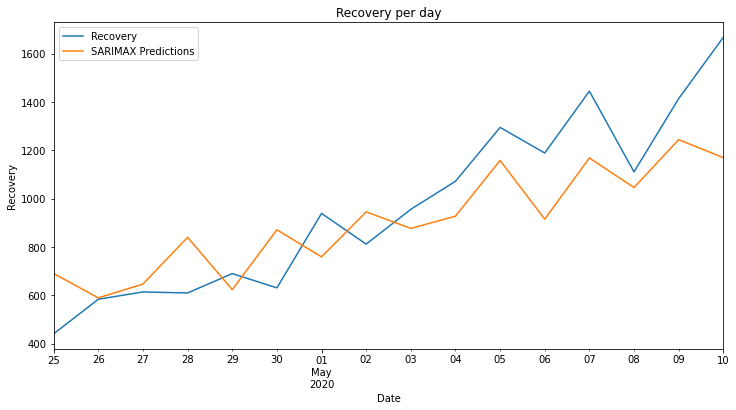

In [123]:
# Plot predictions against known values
title = 'Recovery per day'
ylabel='Recovery'
xlabel='Date'

ax = test['Recovery'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [124]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Recovery'], predictions)
print(f'SARIMAX RMSE Error: {error:11.10}')

SARIMAX RMSE Error: 210.1680794


# 6. Forcasting:~

In [125]:
model = SARIMAX(data2['Recovery'],order=(1, 2, 1),seasonal_order=(1, 1, 0, 7))
results = model.fit()

In [128]:
fcast = results.predict(len(data2),len(data2)+10,typ='levels').rename('SARIMAX Forecast')

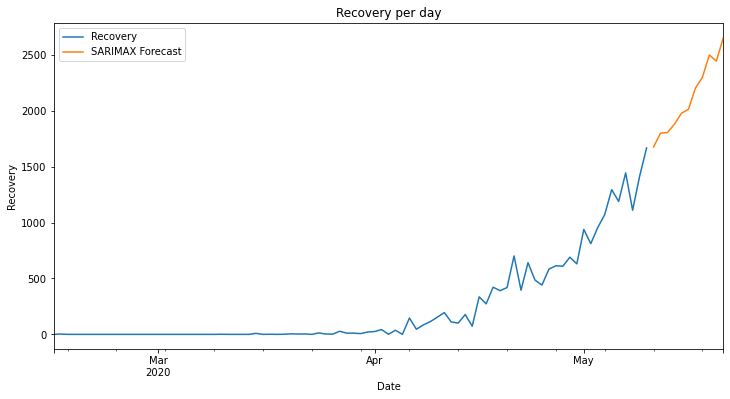

In [129]:
# Plot predictions against known values
title = 'Recovery per day'
ylabel='Recovery'
xlabel='Date'

ax = data2['Recovery'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);